In [1]:
import torch
import torch.nn as nn
import numpy as np

import os
import imageio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from new_datasets import data_preprocessing
from model import Voxels,Nerf
from ml_helpers import training
import rendering
torch.cuda.empty_cache()

In [2]:
data_set_path = '/home/eiyike/Desktop/phdproject/MY_NERf2222/new_code_update1/Dataset'


mode = 'train'

In [3]:
dataset = data_preprocessing(data_set_path,mode,target_size=(400,400))

focal_length:  555.5555155968841
(100, 4, 4)
[[-0.99029607  0.0917614  -0.10437164 -0.4207356 ]
 [-0.13897336 -0.65387315  0.7437312   2.99807668]
 [ 0.          0.75101906  0.66028041  2.66167569]
 [ 0.          0.          0.          1.        ]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
size:  (100, 400, 400, 4)
size:  (100, 400, 400, 3)


In [4]:
o, d, target_px_values,total_data = dataset.get_rays()

100 160000


In [5]:
batch_size = 1024

dataloader = DataLoader(
    torch.cat(
              (torch.from_numpy(o).reshape(-1, 3),
               torch.from_numpy(d).reshape(-1, 3),
               torch.from_numpy(target_px_values).reshape(-1, 3)
               ), dim=1),
              batch_size=batch_size, shuffle=True)       # (-1,3)  means N*H*W , 3

In [6]:
size_h, size_w = (400,400)
dataloader_warmup = DataLoader(
    torch.cat(
        (torch.from_numpy(o).reshape(total_data, size_h, size_w, 3)[:, 100:300, 100:300, :].reshape(-1, 3),
         torch.from_numpy(d).reshape(total_data, size_h, size_w, 3)[:, 100:300, 100:300, :].reshape(-1, 3),
        torch.from_numpy(target_px_values).reshape(total_data, size_h, size_w, 3)[:, 100:300, 100:300, :].reshape(-1, 3)),
        dim=1),
        batch_size=batch_size, shuffle=True)

In [7]:
device = 'cuda'

tn = 2
tf = 6
nb_epochs = 1
lr = 1e-3
gamma = .5
nb_bins = 100

model = Voxels(scale=3, device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=gamma)

RuntimeError: CUDA error: out of memory

100%|██████████| 3907/3907 [02:18<00:00, 28.14it/s]


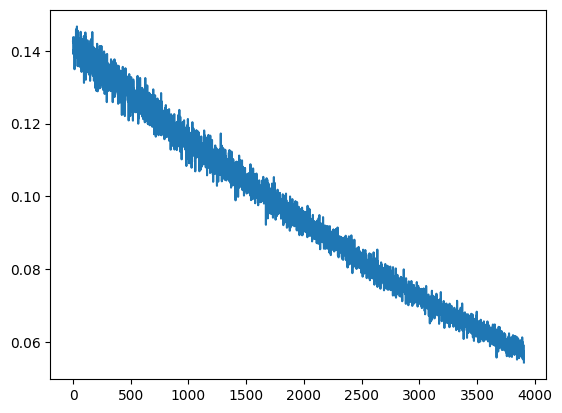

In [9]:
training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, 1, dataloader_warmup, device=device)
plt.plot(training_loss)
plt.show()

100%|██████████| 15625/15625 [09:29<00:00, 27.42it/s]


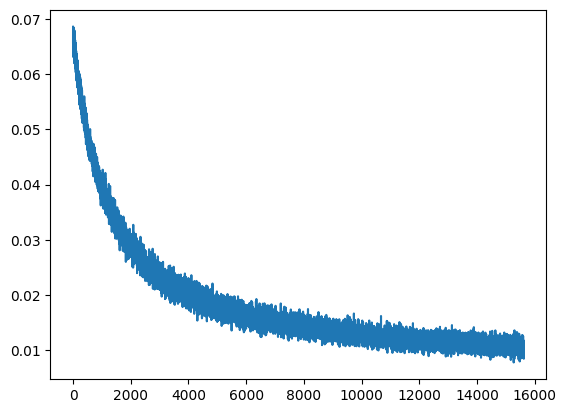

In [10]:
nb_epochs = 1
training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, nb_epochs, dataloader, device=device)
plt.plot(training_loss)
plt.show()

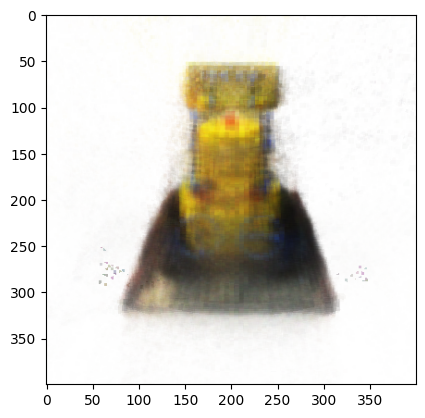

In [11]:
img = rendering.rendering(model, torch.from_numpy(o[0]).to(device), torch.from_numpy(d[0]).to(device),
                tn, tf, nb_bins=100, device=device)
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

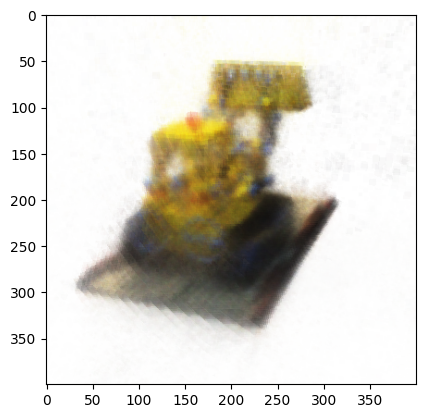

In [12]:
img = rendering.rendering(model, torch.from_numpy(o[1]).to(device), torch.from_numpy(d[1]).to(device),
                tn, tf, nb_bins=100, device=device)
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

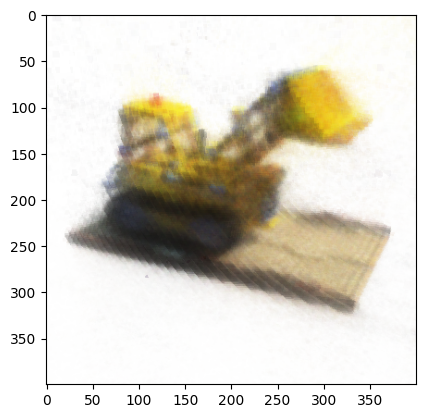

In [13]:
img = rendering.rendering(model, torch.from_numpy(o[2]).to(device), torch.from_numpy(d[2]).to(device),
                tn, tf, nb_bins=100, device=device)
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

In [7]:
# device = 'cuda'
#
# tn = 2
# tf = 8
# nb_epochs = 3
# lr = 1e-3
# gamma = .5
# nb_bins = 100

In [8]:
Jeff=torch.load('/home/eiyike/Desktop/phdproject/MY_NERf2222/new_code_update1/model_nerf')
Jeff.to(device)

Voxels()

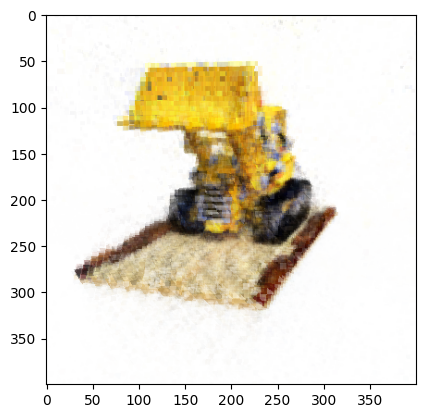

In [9]:
# anglev = 55
# img = rendering.rendering(Jeff, torch.from_numpy(o[anglev]).to(device), torch.from_numpy(d[anglev]).to(device),
#                 tn, tf, nb_bins=100, device=device)
# plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())